In [9]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")

In [2]:
avocado_stats = pd.read_csv('avocado.csv')

In [3]:
avocado_stats.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330,64236.620,1036.740,54454.850,48.160,8696.870,8603.620,93.250,0.000,conventional,2015,Albany
1,1,2015-12-20,1.350,54876.980,674.280,44638.810,58.330,9505.560,9408.070,97.490,0.000,conventional,2015,Albany
2,2,2015-12-13,0.930,118220.220,794.700,109149.670,130.500,8145.350,8042.210,103.140,0.000,conventional,2015,Albany
3,3,2015-12-06,1.080,78992.150,1132.000,71976.410,72.580,5811.160,5677.400,133.760,0.000,conventional,2015,Albany
4,4,2015-11-29,1.280,51039.600,941.480,43838.390,75.780,6183.950,5986.260,197.690,0.000,conventional,2015,Albany
5,5,2015-11-22,1.260,55979.780,1184.270,48067.990,43.610,6683.910,6556.470,127.440,0.000,conventional,2015,Albany
6,6,2015-11-15,0.990,83453.760,1368.920,73672.720,93.260,8318.860,8196.810,122.050,0.000,conventional,2015,Albany
7,7,2015-11-08,0.980,109428.330,703.750,101815.360,80.000,6829.220,6266.850,562.370,0.000,conventional,2015,Albany
8,8,2015-11-01,1.020,99811.420,1022.150,87315.570,85.340,11388.360,11104.530,283.830,0.000,conventional,2015,Albany
9,9,2015-10-25,1.070,74338.760,842.400,64757.440,113.000,8625.920,8061.470,564.450,0.000,conventional,2015,Albany


In [4]:
avocado_stats.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000
mean,24.232,1.406,850644.013,293008.425,295154.568,22839.736,239639.202,182194.687,54338.088,3106.427,2016.148
std,15.481,0.403,3453545.355,1264989.082,1204120.401,107464.068,986242.399,746178.515,243965.965,17692.895,0.940
min,0.000,0.440,84.560,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2015.000
25%,10.000,1.100,10838.580,854.070,3008.780,0.000,5088.640,2849.420,127.470,0.000,2015.000
50%,24.000,1.370,107376.760,8645.300,29061.020,184.990,39743.830,26362.820,2647.710,0.000,2016.000
75%,38.000,1.660,432962.290,111020.200,150206.860,6243.420,110783.370,83337.670,22029.250,132.500,2017.000
max,52.000,3.250,62505646.520,22743616.170,20470572.610,2546439.110,19373134.370,13384586.800,5719096.610,551693.650,2018.000


In [5]:
avocado_stats.shape

(18249, 14)

In [6]:
avocado_stats.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
missing_values_count = avocado_stats.isnull().sum()
print(missing_values_count)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [12]:
avocado_stats.columns = [
            'sequence', 'Date', 'AvgPrice', 
            'TotalVolume', '4046', 
            '4225', '4770', 'TotalBags',
            'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year', 'Region'
        ]
df = avocado_stats
df.head()

,sequence,Date,AvgPrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,0,2015-12-27,1.330,64236.620,1036.740,54454.850,48.160,8696.870,8603.620,93.250,0.000,conventional,2015,Albany
1,1,2015-12-20,1.350,54876.980,674.280,44638.810,58.330,9505.560,9408.070,97.490,0.000,conventional,2015,Albany
2,2,2015-12-13,0.930,118220.220,794.700,109149.670,130.500,8145.350,8042.210,103.140,0.000,conventional,2015,Albany
3,3,2015-12-06,1.080,78992.150,1132.000,71976.410,72.580,5811.160,5677.400,133.760,0.000,conventional,2015,Albany
4,4,2015-11-29,1.280,51039.600,941.480,43838.390,75.780,6183.950,5986.260,197.690,0.000,conventional,2015,Albany


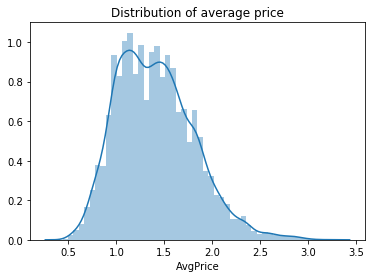

In [15]:
#First, look at average price

sns.distplot(df['AvgPrice'])
plt.title('Distribution of average price')
plt.show()

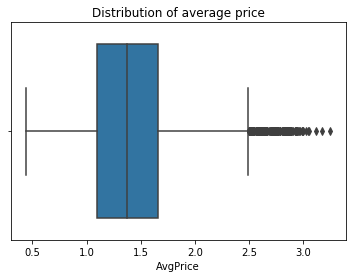

In [16]:
sns.boxplot(df['AvgPrice'])
plt.title('Distribution of average price')
plt.show()

In [17]:
df['AvgPrice'].describe()


count   18249.000
mean        1.406
std         0.403
min         0.440
25%         1.100
50%         1.370
75%         1.660
max         3.250
Name: AvgPrice, dtype: float64

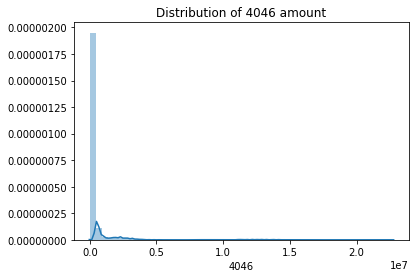

In [18]:
sns.distplot(df['4046'])
plt.title('Distribution of 4046 amount')
plt.show()

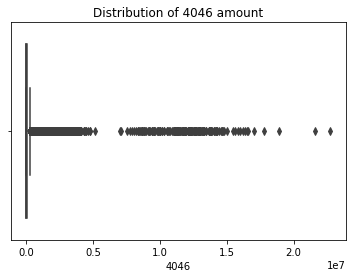

In [19]:
sns.boxplot(df['4046'])
plt.title('Distribution of 4046 amount')
plt.show()

In [22]:
c

count      18249.000
mean      293008.425
std      1264989.082
min            0.000
25%          854.070
50%         8645.300
75%       111020.200
max     22743616.170
Name: 4046, dtype: float64

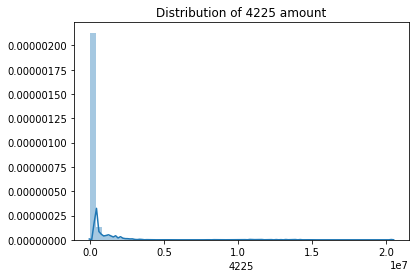

In [20]:
sns.distplot(df['4225'])
plt.title('Distribution of 4225 amount')
plt.show()

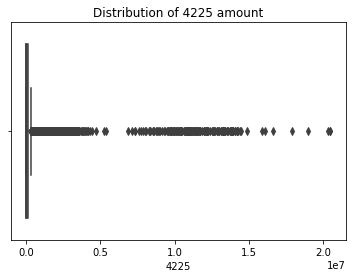

In [21]:
sns.boxplot(df['4225'])
plt.title('Distribution of 4225 amount')
plt.show()

In [23]:
df['4225'].describe()

count      18249.000
mean      295154.568
std      1204120.401
min            0.000
25%         3008.780
50%        29061.020
75%       150206.860
max     20470572.610
Name: 4225, dtype: float64

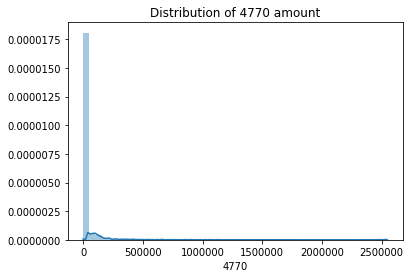

In [26]:
sns.distplot(df['4770'])
plt.title('Distribution of 4770 amount')
plt.show()

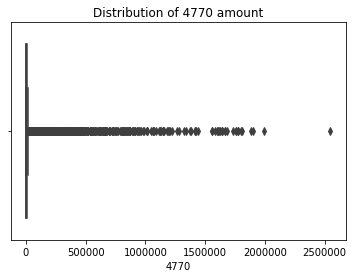

In [27]:
sns.boxplot(df['4770'])
plt.title('Distribution of 4770 amount')
plt.show()

In [28]:
df['4770'].describe()

count     18249.000
mean      22839.736
std      107464.068
min           0.000
25%           0.000
50%         184.990
75%        6243.420
max     2546439.110
Name: 4770, dtype: float64

In [29]:
df['AvgPrice'].quantile(0.95)


2.11

In [30]:
df = df[df['AvgPrice'] < 2.11]


In [31]:
df['4046'].quantile(0.95)

1418114.876999995

In [32]:
df = df[df['4046'] < 1418114.876999995]


In [33]:
df['4225'].quantile(0.95)

609594.5199999998

In [34]:
df = df[df['4225'] < 609594.5199999998]


In [35]:
df['4770'].quantile(0.95)


28644.00399999999

In [36]:
df = df[df['4770'] < 28644.00399999999]


## Define, run and validate multivariate regression model
### Model Equation: Average Price (AvgPrice) = Small Hass (4046) + Large Hass (4225) + X Large Hass (4770)

In [37]:
# Instantiate and fit our model.
regression = linear_model.LinearRegression()
Y = df['AvgPrice']
X = df[['4046', '4225', '4770']]
regression.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regression.coef_)
print('\nIntercept: \n', regression.intercept_)
print('\nR-squared:')
print(regression.score(X, Y))


Coefficients: 
 [-7.42231913e-07 -9.85982153e-08 -1.55952899e-05]

Intercept: 
 1.4935196031862732

R-squared:
0.2624772468595826


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


### Working through Multivariate Regression Assumptions
Assumption One: Linear Relationship with all variables

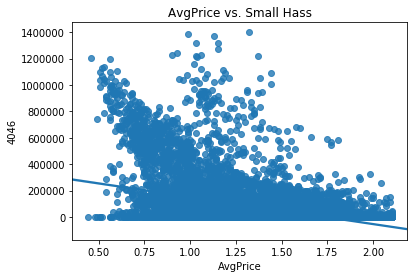

In [40]:
sns.regplot(x='AvgPrice', y='4046', data=df)
plt.title('AvgPrice vs. Small Hass')
plt.show()


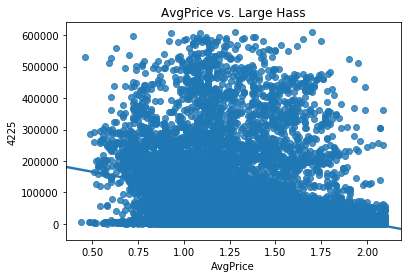

In [42]:
sns.regplot(x='AvgPrice', y='4225', data=df)
plt.title('AvgPrice vs. Large Hass')
plt.show()


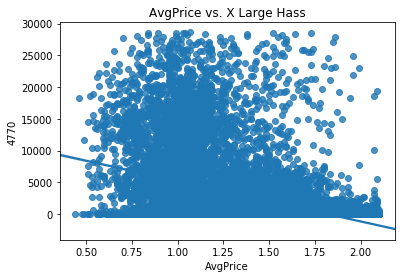

In [43]:
sns.regplot(x='AvgPrice', y='4770', data=df)
plt.title('AvgPrice vs. X Large Hass')
plt.show()


Assumption Two: Multivariate Normality

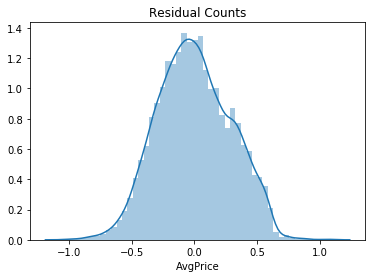

In [44]:
# Extract predicted values.
predicted = regression.predict(X).ravel()
actual = df['AvgPrice']

# Calculate the error, also called the residual.
residual = actual - predicted

sns.distplot(residual)
plt.title('Residual Counts')
plt.show()

Assumption Three: Homoscedasticity

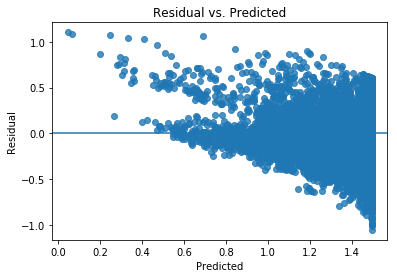

In [45]:
#Plotting residual vs. predicted

sns.regplot(x=predicted, y=residual, fit_reg=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Assumption Four: Low Multicollinearity

In [46]:
correlation_matrix = X.corr()
display(correlation_matrix)

,4046,4225,4770
4046,1.000,0.517,0.391
4225,0.517,1.000,0.505
4770,0.391,0.505,1.000


In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(regression, X, Y, cv=5)

array([-1.42251241, -0.11571585,  0.16887084, -0.05502634, -0.21572606])

### Now let's build a KNN Regression Model based off the same data, at K=10
#### First, unweighted, K=10

In [49]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

#### Second, weighted, K=10

In [50]:
from sklearn import neighbors

# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

### Build another KNN Regressiona at K=50¶
#### First, unweighted, K=50

In [51]:
from sklearn import neighbors

# Build our model.
knn_50 = neighbors.KNeighborsRegressor(n_neighbors=50)
knn_50.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='uniform')

#### Second, weighted, K=50

In [52]:
# Build our model.
knn_50w = neighbors.KNeighborsRegressor(n_neighbors=50, weights='distance')
knn_50w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='distance')

### Build one more KNN Regressiona at K=1000¶
#### First, unweighted, K=1000

In [53]:
from sklearn import neighbors

# Build our model.
knn_1000 = neighbors.KNeighborsRegressor(n_neighbors=1000)
knn_1000.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1000, p=2,
          weights='uniform')

#### Second, weighted, K=1000

In [54]:
# Build our model.
knn_1000w = neighbors.KNeighborsRegressor(n_neighbors=1000, weights='distance')
knn_1000w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1000, p=2,
          weights='distance')

In [55]:
from sklearn.model_selection import cross_val_score

#Original - K=10, weighted and unweighted
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy, K=10: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy, K=10: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

#K=50, weighted and unweighted
score_50 = cross_val_score(knn_50, X, Y, cv=5)
print("Unweighted Accuracy, K=50: %0.2f (+/- %0.2f)" % (score_50.mean(), score_50.std() * 2))

score_50w = cross_val_score(knn_50w, X, Y, cv=5)
print("Weighted Accuracy, K=50: %0.2f (+/- %0.2f)" % (score_50w.mean(), score_50w.std() * 2))

#K=1000, weighted and unweighted
score_1000 = cross_val_score(knn_1000, X, Y, cv=5)
print("Unweighted Accuracy, K=1000: %0.2f (+/- %0.2f)" % (score_1000.mean(), score_1000.std() * 2))

score_1000w = cross_val_score(knn_1000w, X, Y, cv=5)
print("Weighted Accuracy, K=1000: %0.2f (+/- %0.2f)" % (score_1000w.mean(), score_1000w.std() * 2))

Unweighted Accuracy, K=10: -0.12 (+/- 0.69)
Weighted Accuracy, K=10: -0.14 (+/- 0.68)
Unweighted Accuracy, K=50: -0.06 (+/- 0.66)
Weighted Accuracy, K=50: -0.06 (+/- 0.65)
Unweighted Accuracy, K=1000: -0.14 (+/- 0.86)
Weighted Accuracy, K=1000: -0.08 (+/- 0.76)
